# 线性回归

In [6]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [5]:
start = time()
d = a + b
print(time() - start)

0.0


In [8]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
lables = true_w[0] * features[:,0] +  true_w[1] * features[:,1] + true_b
lables += torch.tensor(np.random.normal(0, 0.01, size=lables.size()), dtype=torch.float32)

In [11]:
print(features[0], lables[0])

tensor([ 1.2707, -0.2215]) tensor(7.5045)


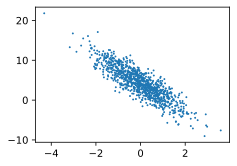

In [13]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
    

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].numpy(), lables.numpy(), 1);

In [14]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [17]:
batch_size = 10

for X, y in data_iter(batch_size, features, lables):
    print(X, y)
    break

tensor([[ 0.1509,  1.2548],
        [ 1.3021,  1.1345],
        [ 1.2829, -0.5036],
        [-1.5553, -1.2680],
        [-1.4596, -0.2911],
        [ 1.0593, -0.2835],
        [ 0.1278,  0.3950],
        [-0.2691, -0.5328],
        [-2.4419,  0.9702],
        [ 0.9418, -1.3410]]) tensor([ 0.2554,  2.9544,  8.4801,  5.4002,  2.2611,  7.2920,  3.1188,  5.4727,
        -3.9770, 10.6332])


In [18]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [19]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [20]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [21]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [22]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, lables):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), lables)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.033543
epoch 2, loss 0.000117
epoch 3, loss 0.000052


In [26]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9999],
        [-3.3988]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)
